# Gender Inequality

Author: Khanh Linh Bui

Course Project, UC Irvine, Math 10, F23

## Introduction


My project revolves around addressing gender inequality globally by presenting and comparing data related to the Gender Inequality Index (GII) across different countries. Additionally, I have implemented a machine learning model that predicts the GII by leveraging the feature of female secondary education, offering insights into classifying human development levels based on specific criteria. Through these efforts, my project aims to contribute to a comprehensive understanding of gender disparities and human development patterns worldwide. 

## Gender Inequality Around The World


## I. Data Cleaning

In [ ]:
# import library
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression


In [ ]:
df = pd.read_csv("Gender_Inequality_Index.csv")
df = df.dropna()
df = df.drop_duplicates()
df.head(5)

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5
5,Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7


In [ ]:
df.shape

(170, 11)

## II. Data Visualization

In [ ]:
df.dtypes

Country                   object
Human_development         object
GII                      float64
Rank                     float64
Maternal_mortality       float64
Adolescent_birth_rate    float64
Seats_parliament         float64
F_secondary_educ         float64
M_secondary_educ         float64
F_Labour_force           float64
M_Labour_force           float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                170 non-null    object 
 1   Human_development      170 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     170 non-null    float64
 5   Adolescent_birth_rate  170 non-null    float64
 6   Seats_parliament       170 non-null    float64
 7   F_secondary_educ       170 non-null    float64
 8   M_secondary_educ       170 non-null    float64
 9   F_Labour_force         170 non-null    float64
 10  M_Labour_force         170 non-null    float64
dtypes: float64(9), object(2)
memory usage: 15.9+ KB


In [ ]:
df['Human_development'].unique()

array(['Very high', 'High', 'Medium', 'Low'], dtype=object)

# a) Overview of dataset

In [ ]:
c1 = alt.Chart(df).mark_bar().encode(
    x = 'Human_development',
    y = 'GII',
    color = "Human_development:N"
)
c1

alt.Chart(...)

Lower Human development rate, higher gender inequality index and vice versa

In [ ]:
fig1 = go.Figure(data=go.Choropleth(
    locations = df['Country'],
    locationmode = 'country names',
    z = df['GII'],
    colorscale = 'RdBu',
    colorbar_title = 'GII',
))
fig1.update_layout(
    title_text='Gender Inequality Index'
)

fig1

A geographic map of worldwide GII

# b) Correlation between data

Firstly we covert Human Development into integer to compare with other data

In [ ]:
development_mapping = {
    "Very high": 1,
    "High": 2,
    "Medium": 3,
    "Low": 4
}

df['Human_development_int'] = df['Human_development'].map(development_mapping)

In [ ]:
df

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Human_development_int
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,1
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,1
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,1
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,1
5,Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186,Burundi,Low,0.505,127.0,548.0,53.6,38.9,7.8,13.0,79.0,77.4,4
187,Central African Republic,Low,0.672,166.0,829.0,160.5,12.9,13.9,31.6,63.3,79.5,4
188,Niger,Low,0.611,153.0,509.0,170.5,25.9,9.2,15.2,61.7,84.3,4
189,Chad,Low,0.652,165.0,1140.0,138.3,32.3,7.7,24.4,46.9,69.9,4


In [ ]:
HD = alt.Chart(df).mark_bar().encode(
    x = 'Human_development_int',
    y = 'GII',
    color = "Human_development"
)
HD

alt.Chart(...)

In [ ]:
df_cor = df.corr()
df_cor

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Human_development_int
GII,1.000000,0.996755,0.713515,0.806791,-0.424116,-0.809278,-0.782130,-0.070970,0.158270,0.861164
Rank,0.996755,1.000000,0.733578,0.820780,-0.419945,-0.811686,-0.781625,-0.050753,0.160078,0.865994
Maternal_mortality,0.713515,0.733578,1.000000,0.752769,-0.162221,-0.698014,-0.642572,0.230511,0.106192,0.748021
Adolescent_birth_rate,0.806791,0.820780,0.752769,1.000000,-0.094736,-0.728725,-0.691760,0.260471,0.263851,0.798041
Seats_parliament,-0.424116,-0.419945,-0.162221,-0.094736,1.000000,0.169483,0.168823,0.279015,0.059662,-0.176859
F_secondary_educ,-0.809278,-0.811686,-0.698014,-0.728725,0.169483,1.000000,0.972921,-0.098711,-0.269952,-0.835847
M_secondary_educ,-0.782130,-0.781625,-0.642572,-0.691760,0.168823,0.972921,1.000000,-0.083176,-0.283553,-0.803273
F_Labour_force,-0.070970,-0.050753,0.230511,0.260471,0.279015,-0.098711,-0.083176,1.000000,0.426839,0.081366
M_Labour_force,0.158270,0.160078,0.106192,0.263851,0.059662,-0.269952,-0.283553,0.426839,1.000000,0.156376
Human_development_int,0.861164,0.865994,0.748021,0.798041,-0.176859,-0.835847,-0.803273,0.081366,0.156376,1.000000


In [ ]:
charts = []

for column in df.columns[4:12]:
    chart = alt.Chart(df).mark_circle().encode(
        x=alt.X(column, title=column),
        y='GII',
        color='Human_development_int:N',
        tooltip=['Country', 'GII', column]
    ).properties(
        title=f'{column} vs GII by Country'
    )
    charts.append(chart)

final_chart = alt.hconcat(*charts)
final_chart

alt.HConcatChart(...)

In summary, the visual representation of the data indicates a clear inverse relationship between country development and the Gender Inequality Index. Specifically, when examining the Labor Force Rate, it is noteworthy that the distribution of female labor is more spread towards the left side of the graph compared to male labor. This observation suggests that women globally may face greater job insecurity when compared to men.

## Machine Learning

## 1) Gender Inequality Index Prediction

Using Python and the scikit-learn library to demonstrate linear regression for predicting the Gender Inequality Index based on Female Secondary Education

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X = df[['F_secondary_educ']]
y = df['GII']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.013371863289269646
R-squared: 0.6810502795300843


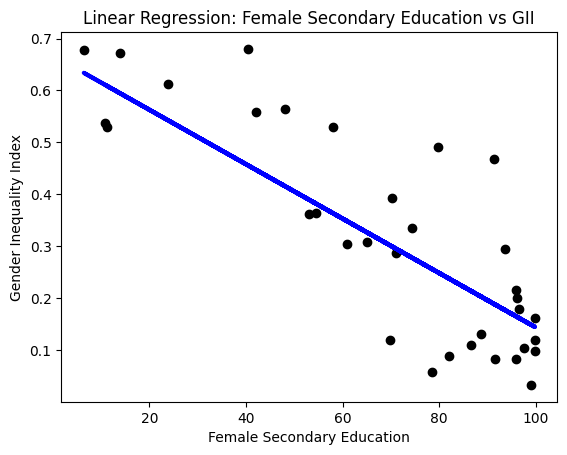

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Female Secondary Education')
plt.ylabel('Gender Inequality Index')
plt.title('Linear Regression: Female Secondary Education vs GII')
plt.show()

# 2) Human Development Classification


Using machine learning for human development allows us to categorize a country's human development rate based on maternal ma criteria. The primary objective of this machine learning approach is to forecast or classify a country's development rate in the future, recognizing the dynamic nature of these metrics that evolve with changes in civilization and the development of countries over time.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve

In [ ]:
df1 = pd.read_csv('Gender_Inequality_Index.csv',index_col=0)
df1 = df1.dropna()
df1 = df1.drop_duplicates()
df1

,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
Country,,,,,,,,,,
Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7
Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0
Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5
Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5
Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7
...,...,...,...,...,...,...,...,...,...,...
Burundi,Low,0.505,127.0,548.0,53.6,38.9,7.8,13.0,79.0,77.4
Central African Republic,Low,0.672,166.0,829.0,160.5,12.9,13.9,31.6,63.3,79.5
Niger,Low,0.611,153.0,509.0,170.5,25.9,9.2,15.2,61.7,84.3


In [ ]:
development_mapping = {
    "Very high":1,
    "High": 2,
    "Medium": 3,
    "Low": 4
}

df1['Human_development_int'] = df1['Human_development'].map(development_mapping)
df1

,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Human_development_int
Country,,,,,,,,,,,
Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,1
Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,1
Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,1
Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,1
Denmark,Very high,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7,1
...,...,...,...,...,...,...,...,...,...,...,...
Burundi,Low,0.505,127.0,548.0,53.6,38.9,7.8,13.0,79.0,77.4,4
Central African Republic,Low,0.672,166.0,829.0,160.5,12.9,13.9,31.6,63.3,79.5,4
Niger,Low,0.611,153.0,509.0,170.5,25.9,9.2,15.2,61.7,84.3,4


In [ ]:
df1.drop(columns='Human_development',inplace=True)
df1

,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Human_development_int
Country,,,,,,,,,,
Switzerland,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,1
Norway,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,1
Iceland,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,1
Australia,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,1
Denmark,0.013,1.0,4.0,1.9,39.7,95.1,95.2,57.7,66.7,1
...,...,...,...,...,...,...,...,...,...,...
Burundi,0.505,127.0,548.0,53.6,38.9,7.8,13.0,79.0,77.4,4
Central African Republic,0.672,166.0,829.0,160.5,12.9,13.9,31.6,63.3,79.5,4
Niger,0.611,153.0,509.0,170.5,25.9,9.2,15.2,61.7,84.3,4


In [ ]:
x_df1,y_df1= df1.iloc[:,:-1],df1['Human_development_int']
x_train,x_test,y_train,y_test= train_test_split(x_df1,y_df1,train_size = 0.6)

In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(max_leaf_nodes = 9, random_state = 27)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=9, random_state=27)

In [ ]:
dtc.score(x_train,y_train)

0.9117647058823529

In [ ]:
dtc.score(x_test,y_test)

0.6764705882352942

[Text(0.375, 0.9, 'Rank <= 82.5\ngini = 0.714\nsamples = 102\nvalue = [41, 26, 19, 16]\nclass = 1'),
 Text(0.16666666666666666, 0.7, 'Maternal_mortality <= 22.5\ngini = 0.404\nsamples = 57\nvalue = [41, 16, 0, 0]\nclass = 1'),
 Text(0.08333333333333333, 0.5, 'gini = 0.184\nsamples = 39\nvalue = [35, 4, 0, 0]\nclass = 1'),
 Text(0.25, 0.5, 'Seats_parliament <= 20.8\ngini = 0.444\nsamples = 18\nvalue = [6, 12, 0, 0]\nclass = 2'),
 Text(0.16666666666666666, 0.3, 'M_Labour_force <= 68.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2, 0, 0]\nclass = 1'),
 Text(0.08333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]\nclass = 2'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0]\nclass = 1'),
 Text(0.3333333333333333, 0.3, 'gini = 0.165\nsamples = 11\nvalue = [1, 10, 0, 0]\nclass = 2'),
 Text(0.5833333333333334, 0.7, 'F_secondary_educ <= 27.75\ngini = 0.646\nsamples = 45\nvalue = [0, 10, 19, 16]\nclass = 3'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [0, 0,

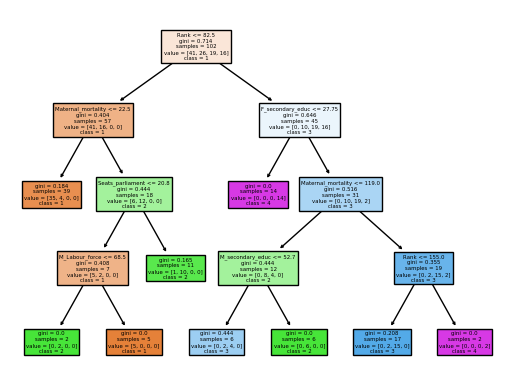

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
plot_tree(dtc, feature_names=x_train.columns,  class_names=['1','2','3','4'], filled=True)

In [ ]:
#K-Nearest Neighbor
#To avoid overfitting and underfitting and decide which n_neighbors would be then best fit for the dataset, KNN validation curve is tested.
train_scores_KNN1, test_scores_KNN1 = validation_curve(KNeighborsClassifier(),x_train,y_train,param_name='n_neighbors',param_range=[1,5,7,9,11],cv=4)
print('avg train acc for each param val:',train_scores_KNN1.mean(axis=1).round(3))
print('avg test acc for each param val:',test_scores_KNN1.mean(axis=1).round(3))

avg train acc for each param val: [1.    0.82  0.794 0.755 0.729]
avg test acc for each param val: [0.667 0.696 0.697 0.716 0.677]


In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.8137254901960784

In [ ]:
knn.score(x_test,y_test)

0.6617647058823529

From the results of two methods, we can see that the Decision Tree Classifier method overfitted the data set and the K-Nearest Neighbors offers a better fitted model. With human development as the target variable, KNN would be the better machine learning method to predict future human development classes based on the same predictor variables.  ## Summary



## References

Your code above should include references.  Here is some additional space for references.

This is the reference data set of gender inequality index around the world i found on kaggle

https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index

I use listed libraries belows as a a reference for my data analysing: 
https://plotly.com/python/map-configuration/